In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arunjangir245/boston-housing-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\calan\.cache\kagglehub\datasets\arunjangir245\boston-housing-dataset\versions\2


In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\calan\Desktop\HTML\spotify\BostonHousing.csv")

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


About Dataset


    crim: Per capita crime rate by town.
    zn: Proportion of large residential lots (over 25,000 sq. ft.).
    indus: Proportion of non-retail business acres per town.
    Chas: Binary variable indicating if the property is near Charles River (1 for yes, 0 for no).
    nox: Concentration of nitrogen oxides in the air.
    rm: Average number of rooms per dwelling.
    age: Proportion of old owner-occupied units built before 1940.
    dis: Weighted distances to Boston employment centers.
    rad: Index of accessibility to radial highways.
    tax: Property tax rate per $10,000.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df = df.dropna()

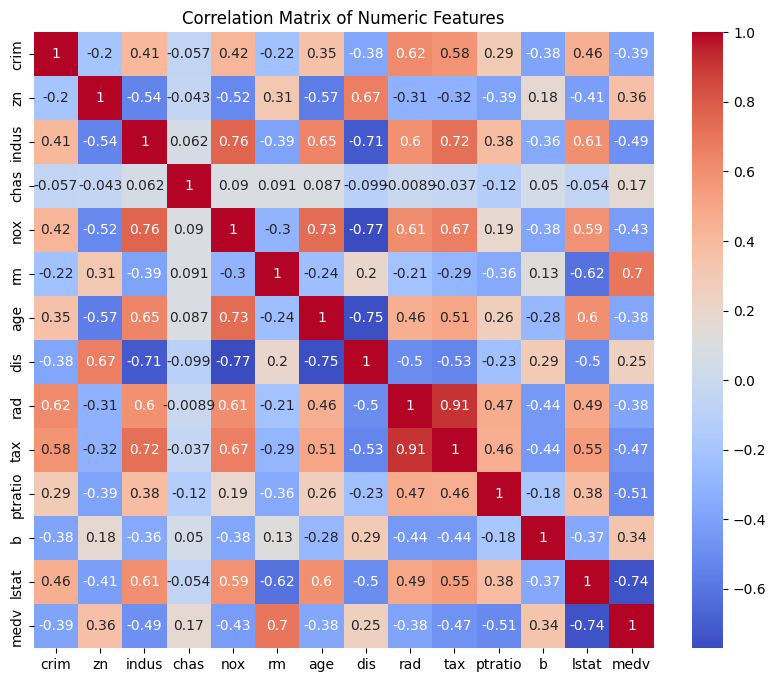

In [6]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Optional: Display as heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


## Positive Corr between each col

crim - rad - 0.62

zn - dis - 0.67

indus - nox - 0.76

chas - medv - 0.17

rm - medv - 0.7

age - nox - 0.73

rad - tax - 0.91

ptratio - rad and tax - 0.47 and 0.46

b - medv - 0.34

Istat - tax - 0.55

## Negative corr
crim - medv -> -0.39

zn - age -> -0.57

indus - dis -> -0.71

chas - dis -> -0.099

nox - dis -> -0.77

rm - istat -> -0.62

age - dis -> -0.75

rad - dis -> -0.5

tax - dis -> -0.53

ptratio - medv -> -0.51

b - rad and tax -> -0.44

istat - medv -> -0.74

# Best for Simple Linear Regression

If your goal is to predict something meaningful (and not just explore correlations between two explanatory variables), you want one of the variables to be the target (dependent variable). In the Boston Housing dataset, the target variable is usually medv (median home value).
From your list, the variable most strongly correlated with medv is:

    rm – medv → 0.70 correlation
    Meaning: More rooms per dwelling → higher home value.
    This is strong enough for a nice, visually clear regression example.

 # Why Not Use rad–tax (0.91) for Regression
Yes, it’s a very high correlation, but both are explanatory variables — neither is the target.
A regression between two predictors doesn’t tell a meaningful “prediction story” for your project; it’s more about detecting multicollinearity.

# Simple Linear Regression:
Use rm (average rooms per dwelling) as the predictor and medv (median house value) as the target.

This will give:

A strong, intuitive positive correlation.

A clear scatterplot with a well-fitting regression line.

An R² around 0.49 (since 0.70² ≈ 0.49), meaning ~49% of variation in price is explained by rooms.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#### Visualize features


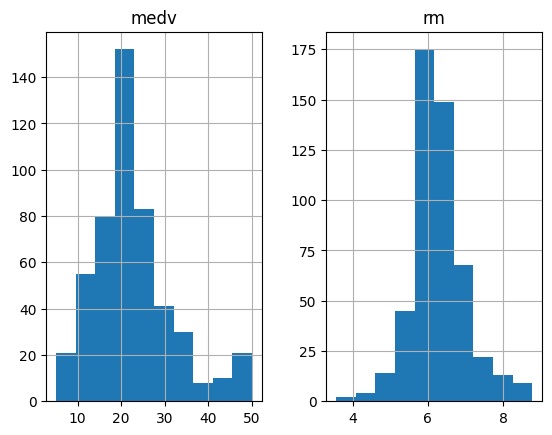

In [8]:
viz = df[['medv','rm']]
viz.hist()
plt.show()

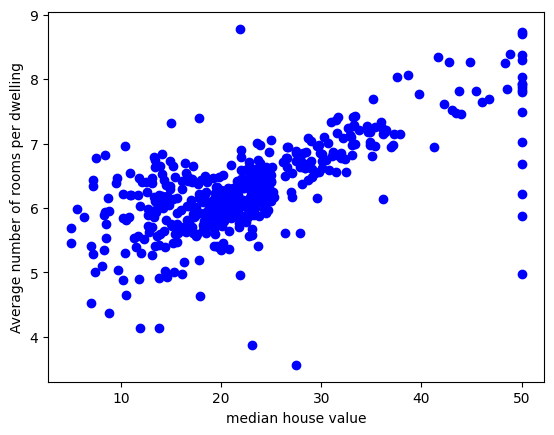

In [9]:
plt.scatter(df.medv, df.rm,  color='blue')
plt.xlabel("median house value")
plt.ylabel("Average number of rooms per dwelling")
plt.show()

In [10]:
cdf = df[df['medv'] < 50].dropna()

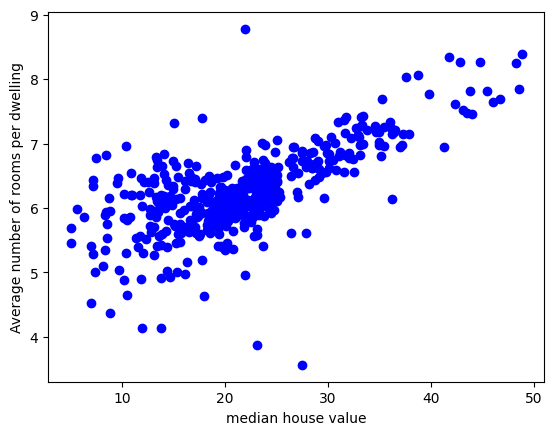

In [11]:
plt.scatter(cdf.medv, cdf.rm,  color='blue')
plt.xlabel("median house value")
plt.ylabel("Average number of rooms per dwelling")
plt.show()

In [12]:
X = cdf.rm.to_numpy()
y = cdf.medv.to_numpy()

#### Create train and test datasets


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
type(X_train), np.shape(X_train), np.shape(X_train)

(numpy.ndarray, (388,), (388,))

In [15]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()
regressor.fit(X_train.reshape(-1, 1), y_train)
print ('Coefficients: ', regressor.coef_[0]) 
print ('Intercept: ',regressor.intercept_)

Coefficients:  8.013021775866962
Intercept:  -28.15159622184052


Coefficient (slope) = 8.013 → On average, each additional room in a house is associated with an increase of about 8,013 in the median home value (since medv is in 1000’s, that’s ~8,000).

Intercept = -28.15 → This is the predicted value of medv when rm = 0. In real terms, it’s not meaningful here because a house can’t have 0 rooms — but it’s part of the linear equation:
medv=−28.15+8.013×rm


### Visualize model outputs


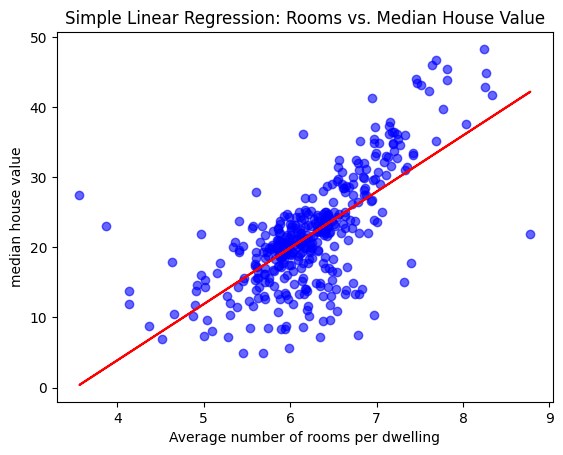

In [16]:
plt.scatter(X_train, y_train, color='blue', alpha=0.6)
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("median house value")
plt.title("Simple Linear Regression: Rooms vs. Median House Value")
plt.show()

#### Model evaluation


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_test_ = regressor.predict(X_test.reshape(-1,1))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))

Mean absolute error: 4.13
Mean squared error: 31.97
Root mean squared error: 5.65
R2-score: 0.46


### Results

1. R² = 0.46

    This means your model explains 46% of the variation in median home value (medv) based on just one predictor (rm – average number of rooms).

Conclusion

The simple linear regression model using average number of rooms per dwelling (rm) as the sole predictor explains 46% of the variation in median home value (medv). This indicates a moderately strong positive relationship — houses with more rooms tend to have higher values.

The model’s RMSE of 5.65 suggests that predicted prices are typically off by around $5,650, while the MAE of $4,130 shows the average error without heavy influence from extreme cases. These errors are reasonable for a single-predictor model in real estate, where prices are influenced by many other factors such as location, property age, and neighborhood characteristics.

While this model provides a clear positive relationship and interpretable insights, its R² of 0.46 leaves over half of the variation in prices unexplained, meaning additional predictors could significantly improve accuracy. In future steps, incorporating other factors (e.g., lstat, ptratio, tax) in a multiple regression model would likely raise R² and reduce prediction error.
    If you used multiple regression with more predictors, expect R² to increase.

2. RMSE = 5.65

    RMSE measures the average prediction error in the same units as the target (in this dataset, medv is in $1000’s).

    RMSE of 5.65 means your predictions are typically off by about $5,650.

    This is reasonable, but still shows there’s room for improvement with more predictors.

3. MAE = 4.13

    On average, your predictions are $4,130 away from the actual values.

    MAE is less sensitive to large outliers than RMSE, so having both numbers helps understand error distribution.

4. MSE = 31.97

    This is just the squared version of RMSE and is less interpretable in raw units it’s mainly used for optimization.

### Conclusion

The simple linear regression model using average number of rooms per dwelling (rm) as the sole predictor explains 46% of the variation in median home value (medv). This indicates a moderately strong positive relationship houses with more rooms tend to have higher values.

The model’s RMSE of 5.65 suggests that predicted prices are typically off by around $5,650, while the MAE of $4,130 shows the average error without heavy influence from extreme cases. These errors are reasonable for a single-predictor model in real estate, where prices are influenced by many other factors such as location, property age, and neighborhood characteristics.

While this model provides a clear positive relationship and interpretable insights, its R² of 0.46 leaves over half of the variation in prices unexplained, meaning additional predictors could significantly improve accuracy. In future steps, incorporating other factors (e.g., lstat, ptratio, tax) in a multiple regression model would likely raise R² and reduce prediction error.

# Multiple Linear Regression


#### 1. Choose Predictors

We’ll select variables that:

    Are related to medv (target)

    Aren’t too highly correlated with each other (to avoid multicollinearity)

Recommended predictors for this dataset:

    rm → strong positive with medv (+0.70)

    lstat → strong negative with medv (-0.74)

    ptratio → moderate negative with medv (-0.51)

    chas → weak positive with medv (+0.17, categorical 0/1)

    tax or rad (pick one, since correlation = 0.91 between them)

In [18]:
cdf = cdf.drop(['crim', 'zn', 'indus','nox','age', 'dis', 'rad', 'b'],axis=1)

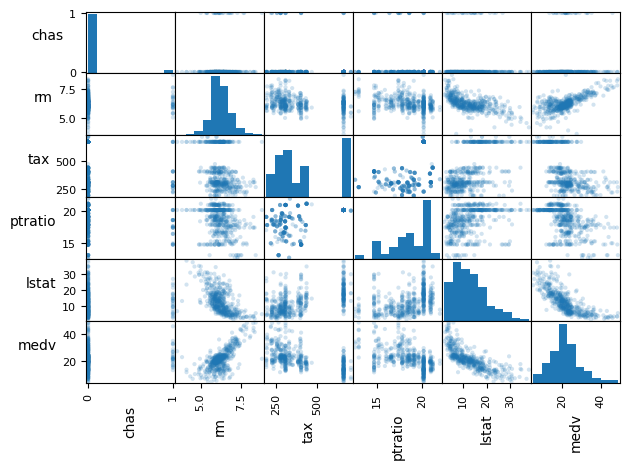

In [34]:
axes = pd.plotting.scatter_matrix(cdf, alpha=0.2)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

cdf = df[df['medv'] < 50].dropna()

X = cdf[['rm', 'b', 'lstat', 'ptratio', 'tax','chas']]
y = cdf['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))


Coefficients: [ 4.20047151  0.00751902 -0.39049082 -0.74715641 -0.00555619  0.20449571]
Intercept: 14.095551211490179
R² Score: 0.8030357828396236
RMSE: 3.409677020621806
MAE: 2.7260659196629584


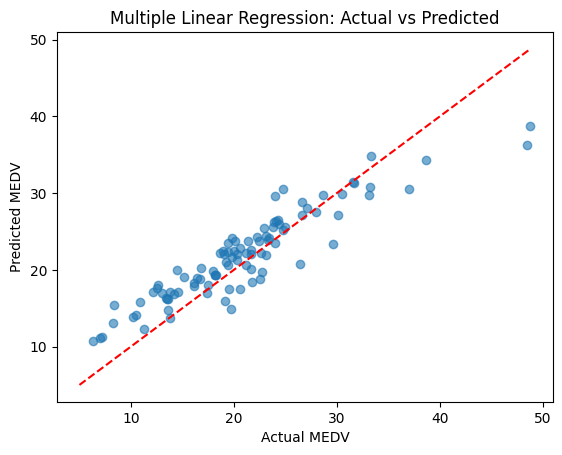

In [38]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  
plt.show()


## 1. Model Fit

    R² = 0.803 → Your model explains ~80.3% of the variation in medv.
    That’s a big jump from the 46% in your simple regression — the extra predictors are pulling their weight.
    anything above 0.80 with a small set of predictors is quite strong.

## 2. Error Metrics

    RMSE = 3.41 → Predictions are typically off by ~$3,410 (in $1,000 units).

    MAE = 2.73 → On average, $2,730 away from actual values.

    The low gap between RMSE and MAE suggests don’t have extreme outliers blowing up the error.

## 3. Coefficients

Given:

[rm, b, lstat, ptratio, tax, chas]
[ 4.2005, 0.0075, -0.3905, -0.7472, -0.0056, 0.2045 ]
Intercept: 14.0956

    rm (4.20) → Each extra room adds ~$4,200 to median value, holding all else constant.

    b (0.0075) → Higher proportion of Black residents (B index) slightly increases medv (effect is small).

    lstat (-0.39) → Each 1% increase in lower-status population decreases medv by ~$390.

    ptratio (-0.75) → Higher pupil-teacher ratio decreases medv by ~$750 per point.

    tax (-0.0056) → Higher property tax rate slightly reduces medv.

    chas (0.204) → Being near the Charles River increases value by ~$204 (small effect — note that chas is binary).

## 4. Conclusion

    Have both positive (rm, b, chas) and negative (lstat, ptratio, tax) influences, which gives it balance.

In [40]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = cdf[['rm', 'b', 'lstat', 'ptratio', 'tax', 'chas']]

X_const = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

print(vif_data)


   Feature         VIF
0    const  344.727135
1       rm    1.673676
2        b    1.300913
3    lstat    2.298085
4  ptratio    1.326660
5      tax    1.850501
6     chas    1.020629


## Conclusion

Rule of thumb:

        VIF < 5 → No serious multicollinearity issues.

        VIF between 5 and 10 → Possible concern.

        VIF > 10 → Serious concern, consider removing the variable.

    In this case, all predictors are far below 5, so multiple linear regression model is statistically healthy

# NOTE
Why Multicollinearity Matters

    In multiple linear regression, predictors should ideally be independent from each other.

    If two or more predictors are highly correlated, the model can:

        Produce unstable coefficients (small changes in data → big swings in coefficients).

        Inflate the standard errors of coefficients, making them statistically insignificant even if they are actually important.

        Make interpretation harder because it’s unclear how much each variable independently influences the target.

What VIF Does

    VIF measures how much the variance of a regression coefficient is inflated because of multicollinearity.

    Interpretation:

        VIF = 1 → No correlation with other predictors.

        VIF < 5 → Generally safe.

        VIF 5–10 → Possible concern.

        VIF > 10 → Severe multicollinearity — consider removing or combining predictors.

Why It’s Good to Checke

results showing all VIF values < 3, meaning:

    Your predictors are not strongly correlated with each other.

    Your multiple regression model is stable and coefficients can be trusted.

    You can add predictors without much risk of multicollinearity but always recheck after adding.